#Perkenalan
Nama: Hafidz Muta'ali

Batch: 006

Face Emotion Detection using CNN algorithm 

dataset yang digunakan didapat dari https://www.kaggle.com/ananthu017/emotion-detection-fer



#Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/EmotionDataset/emotion-detection-fer.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Loading

In [105]:
train = '/content/files/train/'
test = '/content/files/test/'

#EDA (Eksplorasi Data Analys)

In [106]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + expression))) + " " + expression + " images")

7215 happy images
4830 sad images
3171 surprised images
3995 angry images


In [107]:
for expression in os.listdir(test):
    print(str(len(os.listdir(test + expression))) + " " + expression + " images")

1774 happy images
1247 sad images
831 surprised images
958 angry images


im1233.png
im2225.png
im1791.png
im1956.png
im3015.png
im1233.png
im5152.png
im4817.png
im2225.png
im6587.png
im1233.png
im4817.png
im2225.png
im1791.png
im1956.png
im1233.png
im2225.png
im1791.png
im1956.png
im3015.png


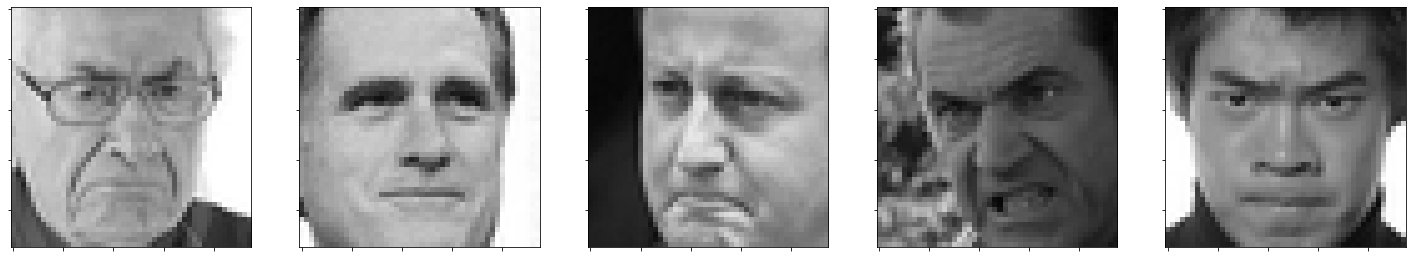

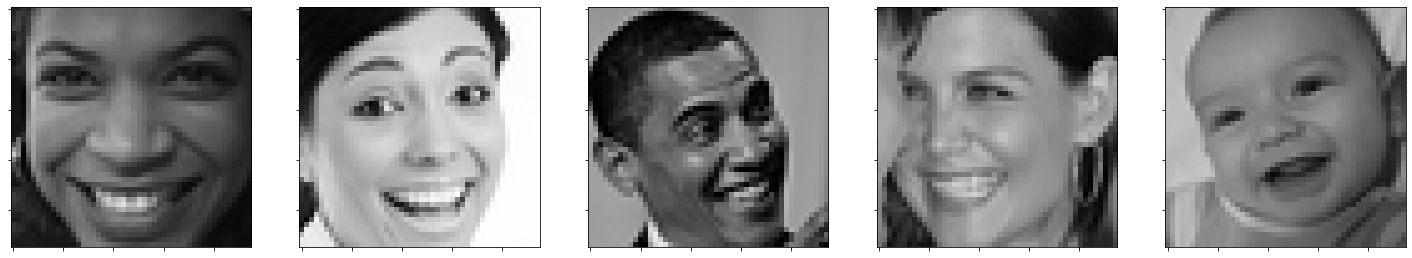

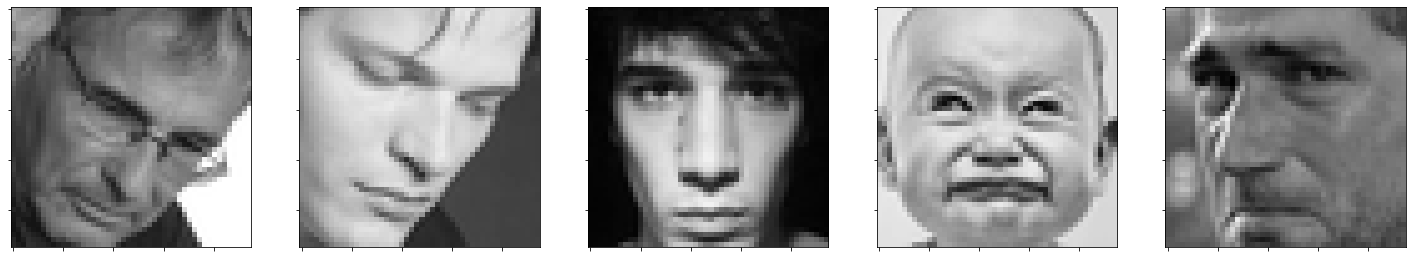

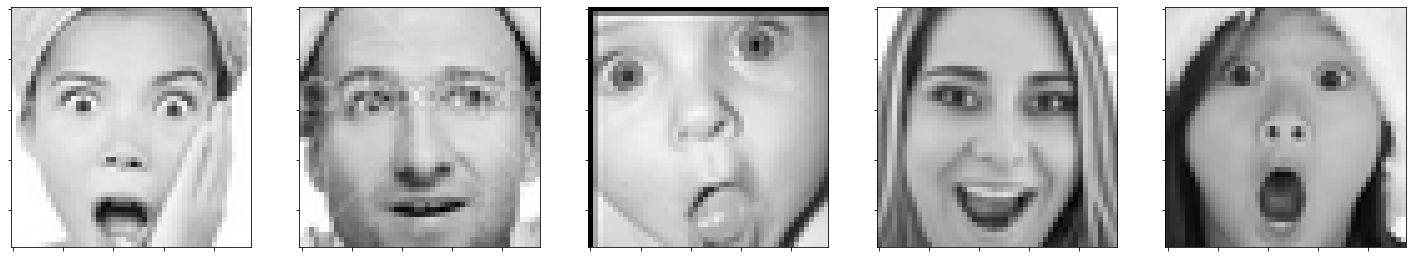

In [108]:
def plot_examples(folder_names, selected_folder, train):    
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(train + '/' + selected_folder)
    for i in range(5):
        print(file_names[i])
        img = cv2.imread(train + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        
plot_examples(os.listdir(train),'angry', train)
plot_examples(os.listdir(train),'happy', train)
plot_examples(os.listdir(train),'sad', train)
plot_examples(os.listdir(train),'surprised', train)


#Data Preprocessing

In [11]:
# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1/255.0,horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train,
                                               batch_size=16,
                                               target_size=(48, 48),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=True)

valid_data = valid_datagen.flow_from_directory(test,
                                               batch_size=16,
                                               target_size=(48, 48),
                                               color_mode='grayscale',
                                               class_mode='categorical',
                                               shuffle=False)

Found 19211 images belonging to 4 classes.
Found 4810 images belonging to 4 classes.


#Pendefinisian Model

##Base Model

In [109]:
tf.keras.backend.clear_session()

In [110]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3,padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [111]:
history = model.fit(train_data,
                    epochs=15,
                    validation_data=valid_data)

Epoch 1/15
1201/1201 [==============================] - 22s 18ms/step - loss: 1.2153 - accuracy: 0.4445 - val_loss: 1.0012 - val_accuracy: 0.5730
Epoch 2/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.9433 - accuracy: 0.5852 - val_loss: 0.9205 - val_accuracy: 0.5861
Epoch 3/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.8345 - accuracy: 0.6418 - val_loss: 0.7920 - val_accuracy: 0.6696
Epoch 4/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.7537 - accuracy: 0.6945 - val_loss: 0.7637 - val_accuracy: 0.6840
Epoch 5/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.7041 - accuracy: 0.7140 - val_loss: 0.7237 - val_accuracy: 0.7050
Epoch 6/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.6682 - accuracy: 0.7316 - val_loss: 0.7225 - val_accuracy: 0.7071
Epoch 7/15
1201/1201 [==============================] - 16s 13ms/step - loss: 0.6370 - accuracy: 0.7435 - val_loss: 0.7418 -

In [112]:
res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60       958
           1       0.84      0.83      0.83      1774
           2       0.66      0.62      0.64      1247
           3       0.73      0.85      0.79       831

    accuracy                           0.73      4810
   macro avg       0.71      0.72      0.71      4810
weighted avg       0.73      0.73      0.73      4810



##Model Improve

pada model improve ditambahkan batchnormalization, memperbanyak node pada hidden layer,menambahkan dropout, dan penambahan epoch pada training

In [113]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))




In [114]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [115]:
history = model.fit(train_data,
                    epochs=27,
                    validation_data=valid_data)

Epoch 1/27
1201/1201 [==============================] - 38s 30ms/step - loss: 1.2017 - accuracy: 0.4841 - val_loss: 0.9735 - val_accuracy: 0.5823
Epoch 2/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.8790 - accuracy: 0.6368 - val_loss: 0.7710 - val_accuracy: 0.6946
Epoch 3/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.7925 - accuracy: 0.6770 - val_loss: 0.8170 - val_accuracy: 0.6507
Epoch 4/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.7475 - accuracy: 0.6999 - val_loss: 0.7352 - val_accuracy: 0.6994
Epoch 5/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.7182 - accuracy: 0.7140 - val_loss: 0.7362 - val_accuracy: 0.6840
Epoch 6/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.6870 - accuracy: 0.7272 - val_loss: 0.6988 - val_accuracy: 0.7258
Epoch 7/27
1201/1201 [==============================] - 36s 30ms/step - loss: 0.6529 - accuracy: 0.7435 - val_loss: 0.7629 -

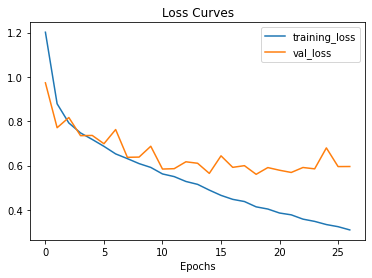

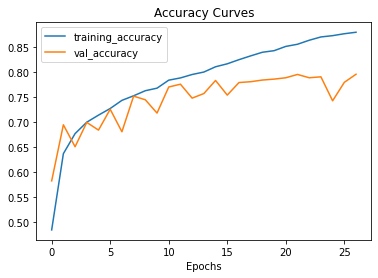

In [121]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()
plot_loss_curves(history)

In [122]:
res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       958
           1       0.87      0.89      0.88      1774
           2       0.70      0.81      0.75      1247
           3       0.85      0.86      0.86       831

    accuracy                           0.80      4810
   macro avg       0.80      0.78      0.79      4810
weighted avg       0.80      0.80      0.80      4810



#Save Model

In [118]:
model_json = model.to_json()
with open('model.json', "w") as json_file:
    json_file.write(model_json)

In [119]:
model.save('/content/drive/MyDrive/EmotionDataset/model.h5')

In [120]:
model.save('model.h5')

#Test

In [123]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml

--2022-02-01 19:52:01--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.02s   

2022-02-01 19:52:01 (43.8 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [124]:
model_try = keras.models.load_model("model.h5")

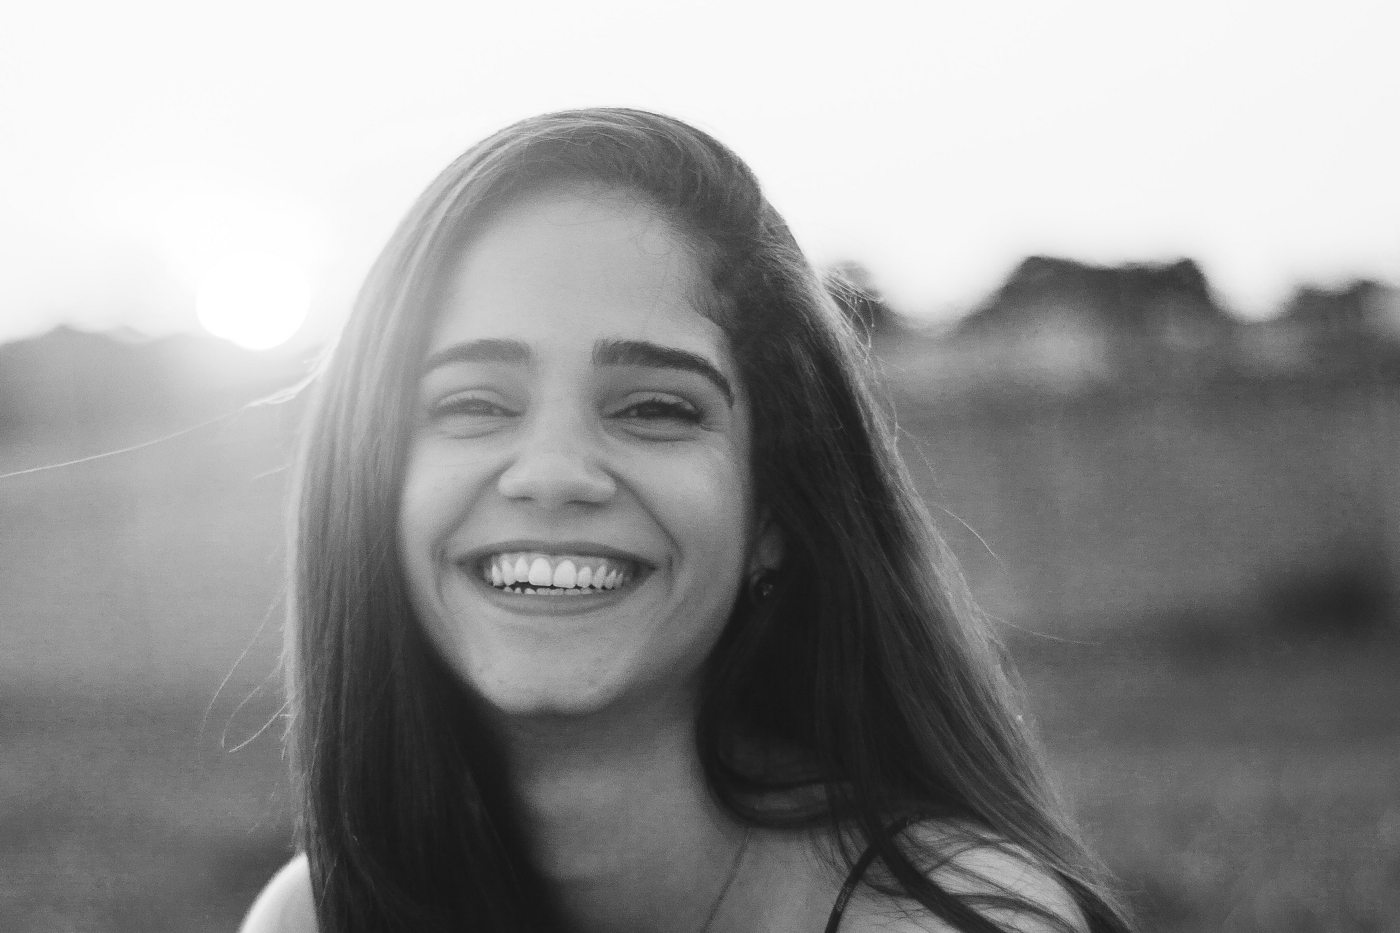

In [125]:
image = cv2.imread('/1_HEoLBLidT2u4mhJ0oiDgig.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [126]:
roi = cv2.resize(img_gray, (48,48))
roi = roi / 255
roi = np.expand_dims(roi, axis = 0)
probs = model_try.predict(roi)
print(probs)

forecasts = np.argmax(probs)
if forecasts == 0:
  print('Angry')
elif forecasts == 1:
  print('Happy')
elif forecasts == 2:
  print('Sad')
else :
  print('Surprise')

[[0.04238333 0.6256948  0.32597926 0.00594253]]
Happy


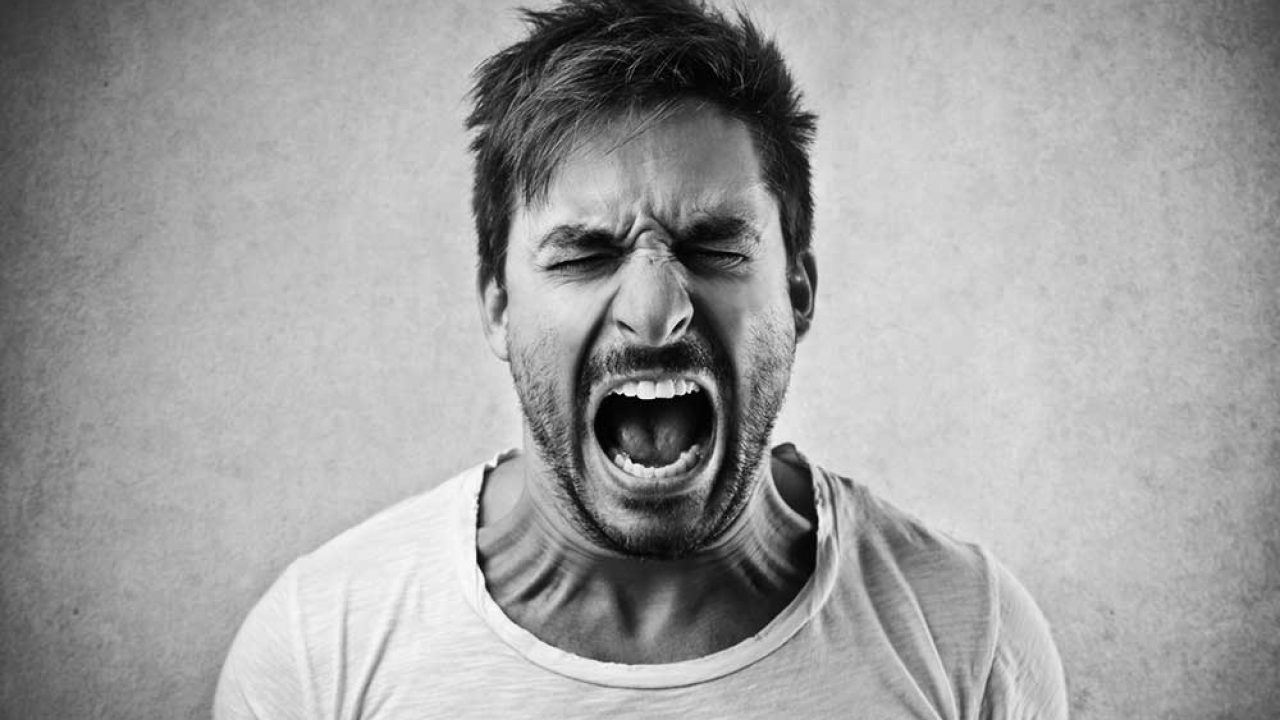

In [127]:
image = cv2.imread('/angry-1280x720.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

In [95]:
roi = cv2.resize(img_gray, (48,48))
roi = roi / 255
roi = np.expand_dims(roi, axis = 0)
probs = model_try.predict(roi)
print(probs)

forecasts = np.argmax(probs)
if forecasts == 0:
  print('Angry')
elif forecasts == 1:
  print('Happy')
elif forecasts == 2:
  print('Sad')
else :
  print('Surprise')

[[0.71166086 0.10404338 0.08466957 0.09962613]]
Angry


#Kesimpulan

Data train yang digunakan ada:

* 7215 happy images
* 4830 sad images
* 3171 surprised images
* 3995 angry images

Total data train yang digunakan ada 19211 images dari 4 kelas

---
Data test yang digunakan ada:
* 1774 happy images
* 1247 sad images
* 831 surprised images
* 958 angry images

Total data test yang digunakan ada 4810 images dari 4 kelas

---
Pada data preprocessing imagedatagen dilakukan scaling 0-1 untuk meringankan kerja model, dan horizontal flip agar model dapat belajar data yang di flip(mirror)

Dikarenakan dataset berukuran 48x48 maka target size digunakan juga 48x48 dan menggunakan color mode grayscale dikarenakan dataset berupa gambar grayscale


---
* Pada Base model akurasi train yang didapat sebesar 0.81(81%) dan akurasi validation yang didapat sebesar 0.73(73%) dapat disimpulkan model cenderung overfit dan kinerja model masih rendah sehingga model akan di improve
* Pada model improvement ditambahkan beberapa batchnormalization, dropout layer, dan node pada hidden layer serta menambahkan epoch pada training. setelah dilakukan training akurasi model mengalami peningkatan yaitu sebesar 0.87(87%) untuk training, dan 0.80(80%) untuk validation. dapat disimpulkan bahwa improvement yang dilakukan berhasil meningkatkan kinerja model dalam melakukan deteksi emosi pada wajah


---
* Pada saat dilakukan pengujian dengan gambar baru, model dapat memprediksi dengan benar emosi pada gambar yang diberikan
* Pada deployment model sudah bisa memprediksi emosi secara real time

